## Rozwiązywanie równań nieliniowych 
Funkcje testowe: 
$$f(x) = 2x^2 -2x + 1$$
$$f(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x5$$
$$f(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f(x) = 3*x + sin(x) - cos^3(x)$$
$$f(x) = 27x^3−3x+1$$ 



In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

f1 = lambda x: 2 * x ** 2 - 2 * x + 1
f2 = lambda x: -26 + 85 * x - 91 * x ** 2 + 44 * x ** 3 - 8 * x ** 4 + x ** 5
f3 = lambda x: 4 ** x - 3 ** (2 * x) + 2 ** (3 * x) - 1
f4 = lambda x: 3 * x + math.sin(x) - math.cos(x) ** 3
f5 = lambda x: 27 * x ** 3 - 3 * x + 1


def draw_plot(func, a, b, n, func_name):
    domain = np.linspace(a, b, n)
    plt.plot(domain, np.vectorize(func)(domain), label=func_name)
    plt.title(func_name)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

### Zadanie 1:
Zaimplementuj metodą bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

In [0]:
def bisection_method(func, a, b, n):
    if func(a) * func(b) >= 0 or n < 1 or a >= b:
        return None, None
    else:
        d = b - a
        c = 1
        for i in range(n):
            c = (a + b) / 2
            if func(c) == 0:
                return c, d / 2 ** i
            elif func(c) * func(a) < 0:
                b = c
            else:
                a = c

        E = d / 2 ** n
        return c, E

def bisection_calculate(func, a, b, n, func_name):
    c, E = bisection_method(func, a, b, n)
    if c is None:
      c = "None"
    if E is None:
      E = "None"

    table = [
        [func_name, f"({a}, {b})", n, c, E]
    ]
    print(tabulate(table, headers=['f(x)', 'interval', 'iterations', 'root', 'error'], tablefmt="fancy_grid"))

    draw_plot(func, a, b, n, func_name)

╒══════════════╤════════════╤══════════════╤════════╤═════════╕
│ f(x)         │ interval   │   iterations │ root   │ error   │
╞══════════════╪════════════╪══════════════╪════════╪═════════╡
│ 2x^2 -2x + 1 │ (-1, 1)    │          100 │ None   │ None    │
╘══════════════╧════════════╧══════════════╧════════╧═════════╛


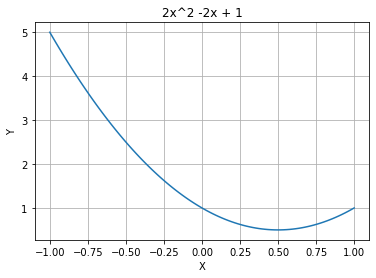

In [0]:
bisection_calculate(f1, -1, 1, 100, "2x^2 -2x + 1")

╒═════════════════════════════════════╤════════════╤══════════════╤══════════╤═════════════╕
│ f(x)                                │ interval   │   iterations │     root │       error │
╞═════════════════════════════════════╪════════════╪══════════════╪══════════╪═════════════╡
│ -26 + 85x - 91x^2 +44x^3 -8x^4 + x5 │ (-1, 3)    │          100 │ 0.557026 │ 3.15544e-30 │
╘═════════════════════════════════════╧════════════╧══════════════╧══════════╧═════════════╛


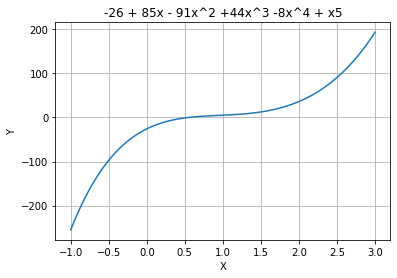

In [0]:
bisection_calculate(f2, -1, 3, 100, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

╒══════════════════════════╤════════════╤══════════════╤══════════════╤═════════════╕
│ f(x)                     │ interval   │   iterations │         root │       error │
╞══════════════════════════╪════════════╪══════════════╪══════════════╪═════════════╡
│ 4^x - 3^(2x) + 2^(3x) -1 │ (-2, 0.5)  │          100 │ -2.77556e-17 │ 2.77556e-16 │
╘══════════════════════════╧════════════╧══════════════╧══════════════╧═════════════╛


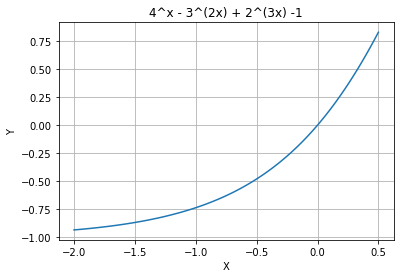

In [0]:
bisection_calculate(f3, -2, 0.5, 100, "4^x - 3^(2x) + 2^(3x) -1")

╒═════════════════════════╤════════════╤══════════════╤════════╤═════════════╕
│ f(x)                    │ interval   │   iterations │   root │       error │
╞═════════════════════════╪════════════╪══════════════╪════════╪═════════════╡
│ 3*x + sin(x) - cos^3(x) │ (-2, 3)    │          100 │ 0.2311 │ 6.93889e-17 │
╘═════════════════════════╧════════════╧══════════════╧════════╧═════════════╛


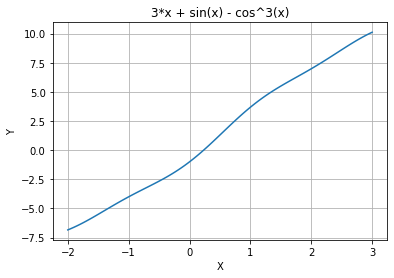

In [0]:
bisection_calculate(f4, -2, 3, 100, "3*x + sin(x) - cos^3(x)")

╒════════════╤════════════╤══════════════╤═══════════╤═════════════╕
│ f(x)       │ interval   │   iterations │      root │       error │
╞════════════╪════════════╪══════════════╪═══════════╪═════════════╡
│ 27x^3−3x+1 │ (-1, 1)    │          100 │ -0.441573 │ 1.57772e-30 │
╘════════════╧════════════╧══════════════╧═══════════╧═════════════╛


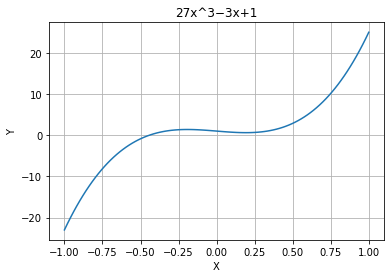

In [0]:
bisection_calculate(f5, -1, 1, 100, "27x^3−3x+1")

Metoda bisekcji - prosty algorytm służący do znajdowania miejsc zerowych funkcji ciągłych jednej zmiennej. Zdefinoiwanie odpowiedniej liczby iteracji zapewnia uzyskanie poprawnych wyników obarczonych niewielkim błędem.


### Zadanie 2: 
Zaimplementuj metodą Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?).

In [0]:
import scipy.misc as misc

def newton_raphson_method(func, a, b, n):
    if func(a) * func(b) >= 0 or n < 1 or a >= b:
      return None
    x = b
    for i in range(n):
        if misc.derivative(func, x) == 0:
            return None
        h = func(x) / misc.derivative(func, x)
        x = x - h
    return x

def newton_rapson_calculate(func, a, b, n, func_name):
    c = newton_raphson_method(func, a, b, n)
    if c is None:
      c = "None"
    table = [
      [func_name, f"({a}, {b})", n, c]
    ]
    print(tabulate(table, headers=['f(x)', 'interval', 'iterations', 'root'], tablefmt="fancy_grid"))
    draw_plot(func, a, b, n, func_name)

╒══════════════╤════════════╤══════════════╤════════╕
│ f(x)         │ interval   │   iterations │ root   │
╞══════════════╪════════════╪══════════════╪════════╡
│ 2x^2 -2x + 1 │ (-1, 1)    │          100 │ None   │
╘══════════════╧════════════╧══════════════╧════════╛


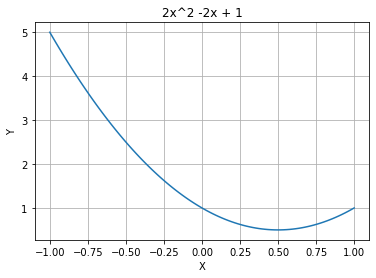

In [0]:
newton_rapson_calculate(f1, -1, 1, 100, "2x^2 -2x + 1")

╒═════════════════════════════════════╤════════════╤══════════════╤══════════╕
│ f(x)                                │ interval   │   iterations │     root │
╞═════════════════════════════════════╪════════════╪══════════════╪══════════╡
│ -26 + 85x - 91x^2 +44x^3 -8x^4 + x5 │ (-1, 3)    │          100 │ 0.557026 │
╘═════════════════════════════════════╧════════════╧══════════════╧══════════╛


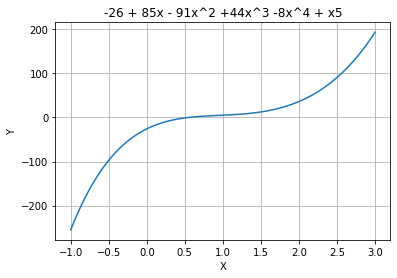

In [0]:
newton_rapson_calculate(f2, -1, 3, 100, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

╒══════════════════════════╤════════════╤══════════════╤══════════════╕
│ f(x)                     │ interval   │   iterations │         root │
╞══════════════════════════╪════════════╪══════════════╪══════════════╡
│ 4^x - 3^(2x) + 2^(3x) -1 │ (-2, 0.5)  │          100 │ -7.52038e-18 │
╘══════════════════════════╧════════════╧══════════════╧══════════════╛


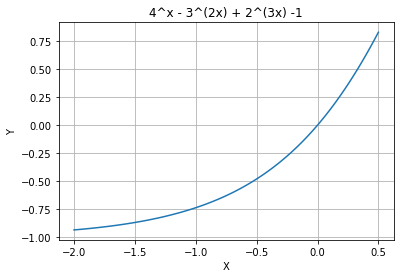

In [0]:
newton_rapson_calculate(f3, -2, 0.5, 100, "4^x - 3^(2x) + 2^(3x) -1")

╒═════════════════════════╤════════════╤══════════════╤════════╕
│ f(x)                    │ interval   │   iterations │   root │
╞═════════════════════════╪════════════╪══════════════╪════════╡
│ 3*x + sin(x) - cos^3(x) │ (-2, 3)    │          100 │ 0.2311 │
╘═════════════════════════╧════════════╧══════════════╧════════╛


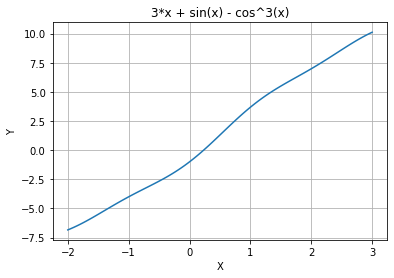

In [0]:
newton_rapson_calculate(f4, -2, 3, 100, "3*x + sin(x) - cos^3(x)")

╒═════════════════════════╤════════════╤══════════════╤════════╕
│ f(x)                    │ interval   │   iterations │   root │
╞═════════════════════════╪════════════╪══════════════╪════════╡
│ 3*x + sin(x) - cos^3(x) │ (-2, 3)    │          100 │ 0.2311 │
╘═════════════════════════╧════════════╧══════════════╧════════╛


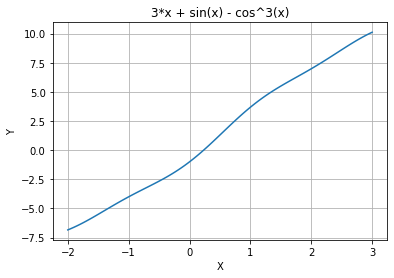

In [0]:
newton_rapson_calculate(f4, -2, 3, 100, "3*x + sin(x) - cos^3(x)")

╒════════════╤════════════╤══════════════╤═══════════╕
│ f(x)       │ interval   │   iterations │      root │
╞════════════╪════════════╪══════════════╪═══════════╡
│ 27x^3−3x+1 │ (-1, 1)    │          100 │ -0.441573 │
╘════════════╧════════════╧══════════════╧═══════════╛


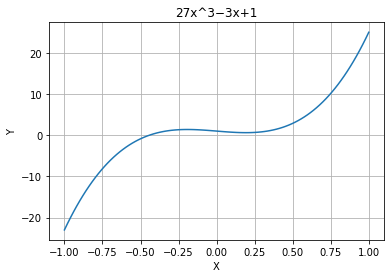

In [0]:
newton_rapson_calculate(f5, -1, 1, 100, "27x^3−3x+1")

### Zadanie 3: 
Zaimplementuje metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [0]:
def secant_euler_method(func, x0, x1, n):
    if func(x0) * func(x1) >= 0 or n <= 0 or x0 >= x1:
        return None
    for i in range(n):
        x2 = x1 - (func(x1) * (x1 - x0)) / (func(x1) - func(x0))
        x0, x1 = x1, x2
    return x2

def secant_euler_calculate(func, a, b, n, func_name):
    c = secant_euler_method(func, a, b, n)
    if c is None:
        c = "None"
    table = [
        [func_name, f"({a}, {b})", n, c]
    ]
    print(tabulate(table, headers=['f(x)', 'interval', 'iterations', 'root'], tablefmt="fancy_grid"))
    draw_plot(func, a, b, n, func_name)

╒══════════════╤════════════╤══════════════╤════════╕
│ f(x)         │ interval   │   iterations │ root   │
╞══════════════╪════════════╪══════════════╪════════╡
│ 2x^2 -2x + 1 │ (-1, 1)    │           10 │ None   │
╘══════════════╧════════════╧══════════════╧════════╛


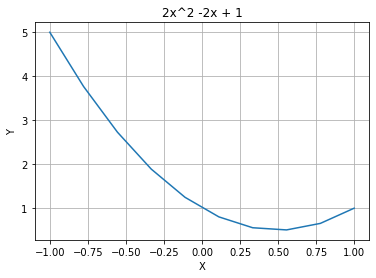

In [0]:
secant_euler_calculate(f1, -1, 1, 10, "2x^2 -2x + 1")

╒═════════════════════════════════════╤════════════╤══════════════╤══════════╕
│ f(x)                                │ interval   │   iterations │     root │
╞═════════════════════════════════════╪════════════╪══════════════╪══════════╡
│ -26 + 85x - 91x^2 +44x^3 -8x^4 + x5 │ (-1, 3)    │           10 │ 0.557026 │
╘═════════════════════════════════════╧════════════╧══════════════╧══════════╛


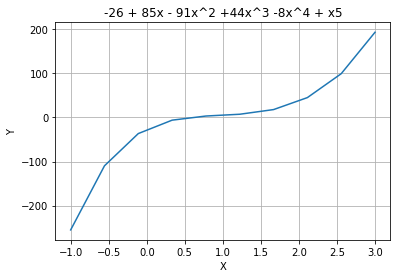

In [0]:
secant_euler_calculate(f2, -1, 3, 10, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

╒══════════════════════════╤════════════╤══════════════╤══════════════╕
│ f(x)                     │ interval   │   iterations │         root │
╞══════════════════════════╪════════════╪══════════════╪══════════════╡
│ 4^x - 3^(2x) + 2^(3x) -1 │ (-2, 0.5)  │           10 │ -1.13904e-17 │
╘══════════════════════════╧════════════╧══════════════╧══════════════╛


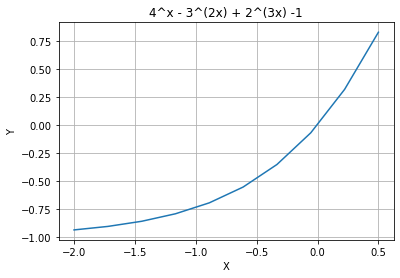

In [0]:
secant_euler_calculate(f3, -2, 0.5, 10, "4^x - 3^(2x) + 2^(3x) -1")

╒═════════════════════════╤════════════╤══════════════╤════════╕
│ f(x)                    │ interval   │   iterations │   root │
╞═════════════════════════╪════════════╪══════════════╪════════╡
│ 3*x + sin(x) - cos^3(x) │ (-2, 3)    │            9 │ 0.2311 │
╘═════════════════════════╧════════════╧══════════════╧════════╛


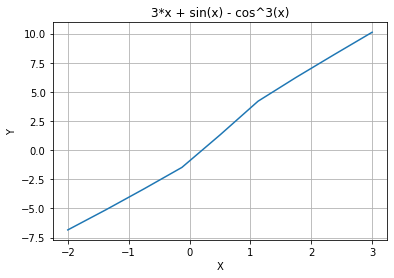

In [0]:
secant_euler_calculate(f4, -2, 3, 9, "3*x + sin(x) - cos^3(x)")

╒════════════╤════════════╤══════════════╤═══════════╕
│ f(x)       │ interval   │   iterations │      root │
╞════════════╪════════════╪══════════════╪═══════════╡
│ 27x^3−3x+1 │ (-1, 1)    │           10 │ 0.0596794 │
╘════════════╧════════════╧══════════════╧═══════════╛


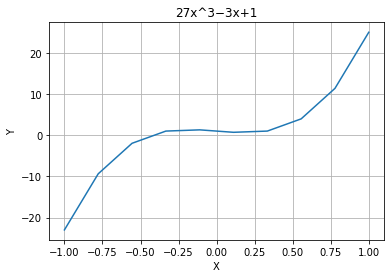

In [0]:
secant_euler_calculate(f5, -1, 1, 10, "27x^3−3x+1")

### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  Porównaj dokładność wszystkiech czterech metod.

In [0]:
from scipy import optimize

def compare(func, a, b, n, func_name):
    scipy_bisect = optimize.bisect(func, a, b)  # used as reference value
    c_bis, E = bisection_method(func, a, b, n)
    if c_bis is None:
      c = "None"
    c_new = newton_raphson_method(func, a, b, n)
    if c_new is None:
      c = "None"
    c_eul = secant_euler_method(func, a, b, n)
    if c_eul is None:
      c = "None"

    print(f"f(x): {func_name}, interval: ({a}, {b})")
    table = [["scipy method", scipy_bisect, 0],
           ["bisection method", c_bis, (abs(c_bis - scipy_bisect) / abs(scipy_bisect))],
           ["newton-Raphson method", c_new, (abs(c_new - scipy_bisect) / abs(scipy_bisect))],
           ["secant method", c_eul, (abs(c_eul - scipy_bisect) / abs(scipy_bisect))]]

    print(tabulate(table, headers=["method", "root", "error"], tablefmt="fancy_grid"))

In [0]:
compare(f2, -1, 3, 10, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

f(x): -26 + 85x - 91x^2 +44x^3 -8x^4 + x5, interval: (-1, 3)
╒═══════════════════════╤══════════╤═════════════╕
│ method                │     root │       error │
╞═══════════════════════╪══════════╪═════════════╡
│ SciPy method          │ 0.557026 │ 0           │
├───────────────────────┼──────────┼─────────────┤
│ bisection method      │ 0.558594 │ 0.00281537  │
├───────────────────────┼──────────┼─────────────┤
│ bewton-Raphson method │ 0.599665 │ 0.0765477   │
├───────────────────────┼──────────┼─────────────┤
│ secant method         │ 0.557026 │ 1.68997e-12 │
╘═══════════════════════╧══════════╧═════════════╛


In [0]:
compare(f3, -2, 0.5, 10, "4^x - 3^(2x) + 2^(3x) -1")

f(x): 4^x - 3^(2x) + 2^(3x) -1, interval: (-2, 0.5)
╒═══════════════════════╤══════════════╤═════════════╕
│ method                │         root │       error │
╞═══════════════════════╪══════════════╪═════════════╡
│ SciPy method          │ -6.82121e-13 │ 0           │
├───────────────────────┼──────────────┼─────────────┤
│ bisection method      │ -0.000488281 │ 7.15828e+08 │
├───────────────────────┼──────────────┼─────────────┤
│ bewton-Raphson method │ -1.72362e-12 │ 1.52686     │
├───────────────────────┼──────────────┼─────────────┤
│ secant method         │ -1.13904e-17 │ 0.999983    │
╘═══════════════════════╧══════════════╧═════════════╛


In [0]:
compare(f4, -2, 3, 9, "3*x + sin(x) - cos^3(x)")

f(x): 3*x + sin(x) - cos^3(x), interval: (-2, 3)
╒═══════════════════════╤══════════╤═════════════╕
│ method                │     root │       error │
╞═══════════════════════╪══════════╪═════════════╡
│ SciPy method          │ 0.2311   │ 0           │
├───────────────────────┼──────────┼─────────────┤
│ bisection method      │ 0.236328 │ 0.0226245   │
├───────────────────────┼──────────┼─────────────┤
│ bewton-Raphson method │ 0.231098 │ 6.14249e-06 │
├───────────────────────┼──────────┼─────────────┤
│ secant method         │ 0.2311   │ 3.08314e-12 │
╘═══════════════════════╧══════════╧═════════════╛


In [0]:
compare(f5, -1, 1, 10, "27x^3−3x+1")

f(x): 27x^3−3x+1, interval: (-1, 1)
╒═══════════════════════╤════════════╤════════════╕
│ method                │       root │      error │
╞═══════════════════════╪════════════╪════════════╡
│ SciPy method          │ -0.441573  │ 0          │
├───────────────────────┼────────────┼────────────┤
│ bisection method      │ -0.443359  │ 0.00404627 │
├───────────────────────┼────────────┼────────────┤
│ bewton-Raphson method │  0.24211   │ 1.54829    │
├───────────────────────┼────────────┼────────────┤
│ secant method         │  0.0596794 │ 1.13515    │
╘═══════════════════════╧════════════╧════════════╛
